In [18]:
###### Config #####
import sys, os, platform
if os.path.isdir("ds-assets"):
  !cd ds-assets && git pull
else:
  !git clone https://github.com/lutzhamel/ds-assets.git
colab = True if 'google.colab' in os.sys.modules else False
system = platform.system() # "Windows", "Linux", "Darwin"
home = "ds-assets/assets/"
sys.path.append(home)  

Already up to date.


In [19]:
# notebook level imports
import pandas
from sklearn import linear_model 
from sklearn import tree
from sklearn import metrics      
import seaborn as sns; sns.set_theme()

# Models of Data

For supervised learning models usually fall into one of two
classes:

* **Classification** - classify a set of objects into several  classes or categories

* **Regression** - estimate a function given a set of example points


# Classification Revisited

* Up till now we have studied the **decision tree** which is an example of a classification model.
* A decision tree limited to a depth of 2 for the iris dataset,
   <pre>
   |--- Petal.Length <= 2.45
   |   |--- class: setosa
   |--- Petal.Length >  2.45
   |   |--- Petal.Width <= 1.75
   |   |   |--- class: versicolor
   |   |--- Petal.Width >  1.75
   |   |   |--- class: virginica
   </pre>

* We visualized this tree model as the piecewise linear model using a scatter plot,
   <img src="https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/tree-viz.png" height="240" width="400">

* Because decision tree models are composed of multiple linear decision surfaces -- lines that separate data points of different classes -- we call decision tree models often **piecewise linear models**.

## Simple Linear Classifiers

* A linear classifier constructs a **linear decision surface**.
* A linear decision surface can only separate two different classes, e.g.,
   
<img src="https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/classification2.jpg" height="300" width="300">


## The Perceptron

* The [perceptron](https://en.wikipedia.org/wiki/Perceptron) is a particularly interesting classifier
* It consists of single neuron neural network (see image below)
* It constructs a **linear decision surface**

### Architecture of a Perceptron

<!-- ![perceptron](assets/perceptron.jpg) -->
<img src="https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/perceptron.jpg" height="300" width="500">

* The weights $w_i$ and the bias term $b$ are called the **free parameters**
* The free parameters are the values the **perceptron training algorithm** has to determine for each dataset
* The perceptron implements the following equation:
   $$\hat{f}(\bar{x}) = sign (-b + \sum^n_{k=1}w_k x_k) = sign(\bar{w}\bullet\bar{x}-b) = y $$
* The ${\rm sign}$ function implements the activation function of the neuron,
   $$sign(x) = -1 \,\,{\rm if}\,\, x \lt 0 \,\,{\rm else}\,\, 1$$
* The symbol $\hat{f}$ denotes the neural network model.

**Note**: If you have taken linear algebra you will recognize the line/plane representation as a dot product.  

### Perceptron Learning

The training algorithm is a simple **directed search**:

<!-- ![perceptron](assets/perceptron-train.jpg) -->
<img src="https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/perceptron-train.jpg"  height="250" width="280">

More precisely, this is a directed search in that the `Update` step uses the *normal vector* $\bar{w}$ of the decision surface $\bar{w} \bullet \bar{x} + b$ as a guide in order to modify $\bar{w}$ and $\bar{b}$.

### Perceptron learning a decision surface.



<img src="https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/perceptron-learning.gif"  height="400" width="500">

**Observation**: The training algorithm searches the space of all possible decision surfaces in order to find one that separates the two classes correctly.

<img src="https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/perceptron-search.png"  height="400" width="500">


### Building a Perceptron

* Let's build a perceptron using Sci-Kit Learn.  
* Let's build a perceptron that classifies our iris flowers.
* Perceptrons by default can only separate two classes, so we have to drop one class

In [20]:
# prepare our data
iris_df = pandas.read_csv(home+"iris.csv")

# The perceptron can only deal with two labels at a
# time so drop one of them: virginica
model_df = iris_df[iris_df.Species != 'virginica']

In [21]:
# training data
X = model_df.drop(columns=['Species'])
y = model_df['Species']

In [22]:
# build and fit the perceptron model
model = linear_model.Perceptron().fit(X, y)

# model accuracy
print("Our model accuracy is: {}%"
      .format(model.score(X,y)*100))

Our model accuracy is: 100.0%


### Visualizing our Perceptron

* Let's build a perceptron just on two variables so we can visualize it.  
* We can only visualize classifiers if the training data is low-dimensional enough.
* The two variables are the variables the tree model selected as most predictive.  

**NOTE**: The following construction is **only** for the purpose of visualization.  For the proper perceptron see the above code.

In [23]:
# feature matrix
# we only include the two variables that appeared in our tree model
# in the previous notebook:
# |--- Petal.Length <= 2.45
# |   |--- class: setosa
# |--- Petal.Length >  2.45
# |   |--- Petal.Width <= 1.75
# |   |   |--- class: versicolor
# |   |--- Petal.Width >  1.75
# |   |   |--- class: virginica

X = model_df[['Petal.Length','Petal.Width']]

# target vector
# recode the labels as numerical values so we can plot
# more easily.
f = (lambda x: 1 if x == 'setosa' else -1)
y = model_df['Species'].apply(f)

In [24]:
# build and fit the perceptron model
model = linear_model.Perceptron().fit(X, y)

# model accuracy
print("Our model accuracy is: {}%"
      .format(model.score(X,y)*100))

Our model accuracy is: 100.0%


slope: -0.90
intercept: 3.00


<Axes: xlabel='Petal.Length', ylabel='Petal.Width'>

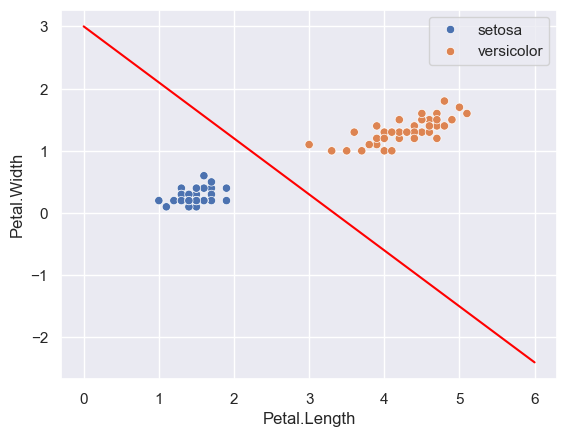

In [25]:
# plot the model
# compute the model in terms that we can plot
slope = model.coef_[0][0]
intercept = model.intercept_[0]
print("slope: {:3.2f}".format(slope))
print("intercept: {:3.2f}".format(intercept))

# scatter plot of the data
sns.scatterplot(model_df, 
                x='Petal.Length', 
                y='Petal.Width', 
                hue='Species')

# plot the model on top of the data
x_ticks = [0,6]
y_ticks = [slope * i + intercept for i in x_ticks]
sns.lineplot(x=x_ticks, 
             y=y_ticks, 
             color='red')

As expected, we see that the model perfectly separates the two classes.

**Observation**: The perceptron can only separate points of two classes as long as the two classes are non-overlapping.  The decision tree can separate an arbitrary number of classes and there is no requirement that they are non-overlapping.

# Regression

In regression problems we try to model continuous values rather than classifying a set of discrete values.

## Simple Linear Regression

In simple linear regression we try to fit a line to data with a single independent numeric variable (x-axis) and a single dependent numeric variable (y-axis),
<br>
<br>

<center>
<img src="https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/linreg-scatter.png"  height="400" width="450">
</center>

[source](https://towardsdatascience.com/mathematics-hidden-behind-linear-regression-431fe4d11969)

The distances of the training points to the line (indicated by the vertical lines) are called **residuals** and represent the error the model makes when modeling the training data.  Given this, simple linear regression can be formalized as an optimization problem over the residuals,
<br>
<br>
$$
\Large
min_{a,b}\,\, \Sigma_i (f(x_i) -y_i)^2
$$

<br>
<br>

where $f(x_i) = a\times x_i + b$ represents the regression model (a line) with the two free parameters $a$ (the slope) and $b$ (the offset).  The quantity $f(x_i) - y_i$ is the residual for training point $(x_i,y_i)$. That is, it is the difference between the value computed by the model, $f(x_i)$, and the given value $y_i$

We can paraphrase the above optimization problem as,

> Using the free parameters $a$ and $b$ minimize the sum square of the residuals.

Below is an illustration of the effects of the parameters $a$ and $b$ on the sum square of the residuals (SS_resid).


<br>
<br>
<center>
<img src="https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/linear-regression.gif"  height="400" width="650">
</center>
<br>
<br>

[source](https://bookdown.org/ybrandvain/Applied-Biostats/linreg.html#the-regression-as-a-linear-model)


**Observation**: When the line is blue the residuals are minimized.

Let's work through an example. Here is an example which given the speed of a car (as a numeric value) gives the breaking distance (as a numeric value).

In [26]:
cars_df = pandas.read_csv(home+"cars.csv")
cars_df.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


We can create a scatter plot of the dependent and independent variables to get a better feel for what's going on.

<Axes: xlabel='speed', ylabel='dist'>

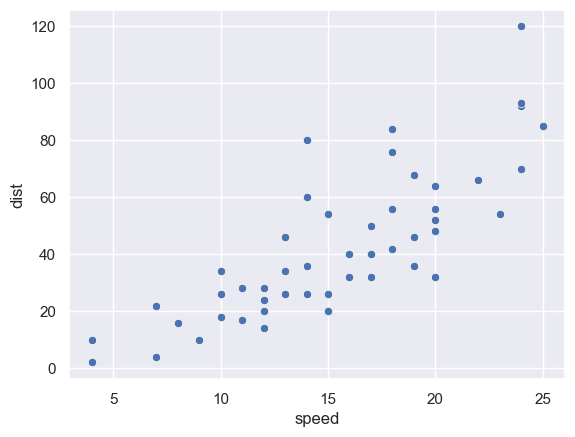

In [27]:
sns.scatterplot(cars_df, 
                x='speed', 
                y='dist')

We will model the relationship between speed and
distance with a linear regression model.

In [28]:
# our training data
X = cars_df[['speed']]
y = cars_df['dist']

In [29]:
# train the model
model = linear_model.LinearRegression().fit(X, y)

<Axes: xlabel='speed', ylabel='dist'>

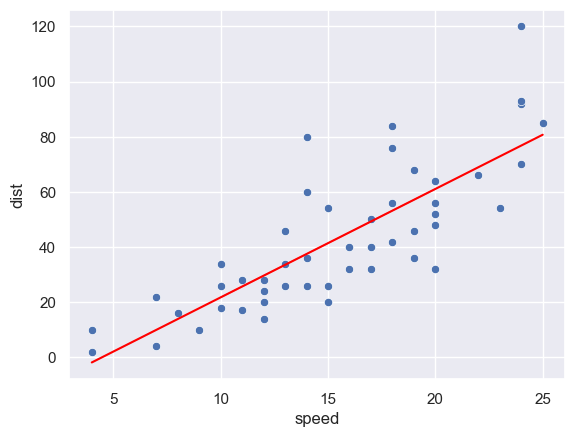

In [30]:
# Plot the model
# scatter plot the data
sns.scatterplot(cars_df, 
                x='speed', 
                y='dist')

# plot the model on top of the data
sns.lineplot(x=X['speed'],
             y=model.predict(X),
             color='red')

## Regression Model Evaluation - $R^2$ Score

Regression models do **not** have a notion of classification accuracy as we saw with decision trees and perceptrons, but they have an [$R^2$ score](https://en.wikipedia.org/wiki/Coefficient_of_determination).  Here, the closer to 1.0 the score the better the model.  The $R^2$ score is a measure of the residuals of the model (we will talk more about this later).


In [31]:
# compute the R^2 score
print(f"R^2 score: {model.score(X,y):.2f}")

R^2 score: 0.65


Not that great.  The low score is mainly due to the fact of the large residuals  at the higher end of the speed spectrum.  The problem is that the data probably does not follow a linear relationship between speed and braking distance.  Let's try a different (non-linear) regression model to see if it can pick up this non-linear relationship.

## Non-Linear Regression: Regression Trees

Non-linear models allow us to model data that has non-linear relationship.  In our case we suspect that speed/dist has a non-linear relationship.

In [32]:
# train the model
model = tree.DecisionTreeRegressor().fit(X,y)

**Observation**: Regression models don't suffer from the same overfitting problems as classifiers do. So in most cases the default model is fine!

<Axes: xlabel='speed', ylabel='dist'>

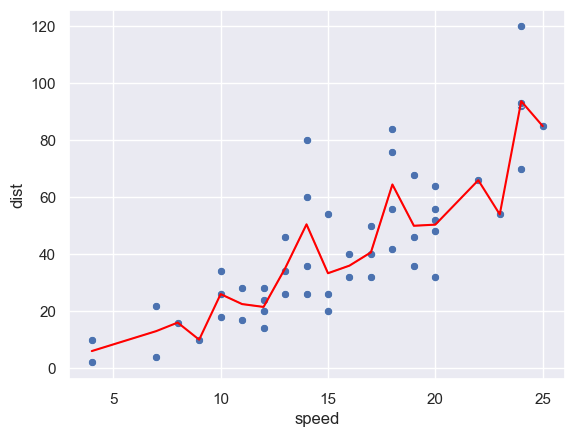

In [33]:
# plot the model
# scatter plot the data
sns.scatterplot(cars_df, 
                x='speed', 
                y='dist')

# plot the model on top of the data
sns.lineplot(x=X['speed'],
             y=model.predict(X),
             color='red')

In [34]:
# compute the R^2 score
print(f"R^2 score: {model.score(X,y):.2f}")


R^2 score: 0.79


Yes, going to a non-linear regression model certainly improved things.  We can see that in this non-linear model the residuals are smaller on average than in the linear model.  